In [1]:
import sys
sys.path.append("..")
%load_ext autoreload

%autoreload 2
import pandas as pd
from misc.config import *
import logging
from models.strategy import *

from experiments import experiment_runner, fit_active_learning, fit_grid

from kaggle_ninja import *

from experiments.utils import *
from experiment_runner import run_experiment

import inspect
from get_data import *
inspect.getsourcelines(run_experiment)
from get_data import _get_raw_data, fingerprints, proteins
from sklearn.decomposition import RandomizedPCA
from sklearn.cluster import DBSCAN
from sklearn.manifold import MDS
from get_data import *

/usr/lib/python2.7/dist-packages/pkg_resources.py:1031: UserWarning: /home/kudkudak/.python-eggs is writable by group/others and vulnerable to attack when used with get_resource_filename. Consider a more secure location (set with .set_extraction_path or the PYTHON_EGG_CACHE environment variable).
  warnings.warn(msg, UserWarning)


In [3]:
from experiments.experiment_runner import run_experiment, run_experiment_grid
from experiments import experiment_runner, fit_active_learning, fit_grid
from sklearn.svm import SVC
 
grid_result_passive = run_experiment("fit_grid",
                                    recalculate_experiments=True,
                                    n_jobs = 4, 
                                    experiment_detailed_name="fit_grid_passive",
                                    base_experiment="fit_active_learning",
                                    seed=666,
                                    grid_params = {"base_model_kwargs:alpha": list(np.logspace(-5,5,10))}, 
                                    base_experiment_kwargs={"strategy": "random_query",
                                                       "loader_function": "get_splitted_uniform_data",
                                                       "batch_size": 1, \
                                                       "base_model": "SGDClassifier",
                                                       "loader_args": {"n_folds": 2}})

ValueError: Didn't find get_splitted_uniform_data

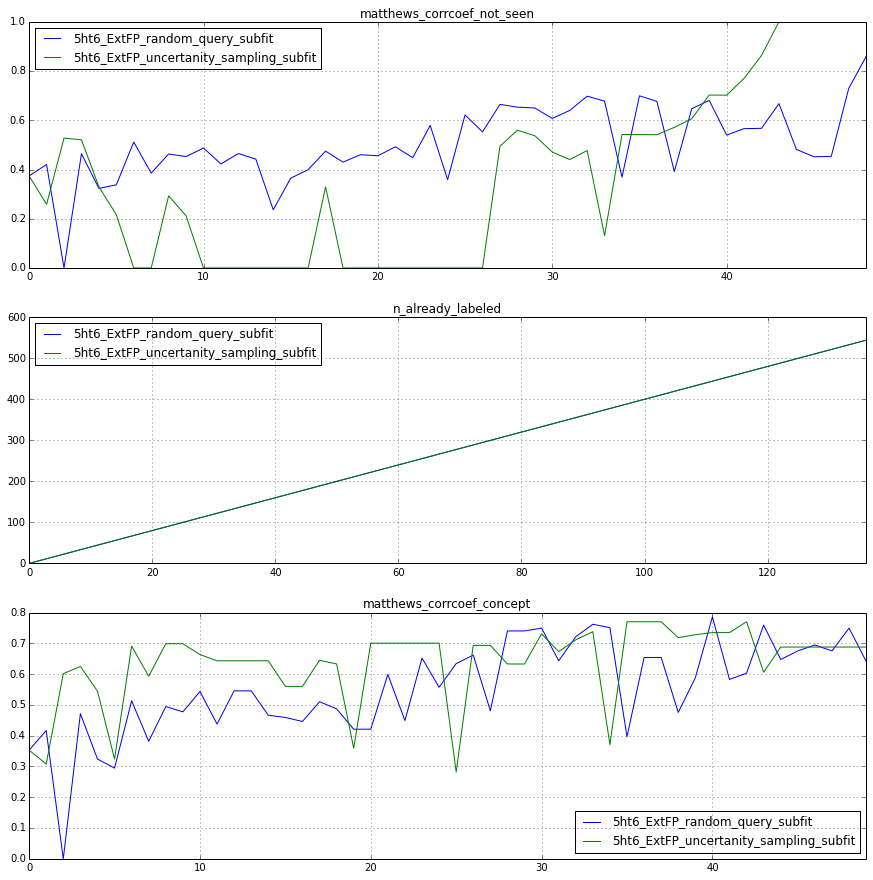

In [13]:
%matplotlib inline
plot_monitors([grid_results_uncert.experiments[0], grid_results.experiments[0]])

In [2]:

loader = ["get_splitted_data",
          {"n_folds": 5,
           "seed":777,
           "test_size":0.0}]
strategy = "random_query"
f = "ExtFP"
grid_results = run_experiment("fit_grid",
                       n_jobs = 2, \
                       experiment_detailed_name="5ht6_"+f+"_"+strategy,
                       base_experiment="fit_active_learning",
                       seed=777,
                       grid_params = {"base_model_kwargs:alpha": list(np.logspace(-5,5,10))},
                       base_experiment_kwargs={"strategy": strategy,
                                               "loader_function": loader[0],
                                               "loader_args": loader[1],
                                                "protein": "5ht6",
                                                "fingerprint":f,
                                               "batch_size": 20, \
                                               "base_model": "SGDClassifier"})

2015-06-01 13:19:08,584 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.base_model"
2015-06-01 13:19:08,587 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.batch_size"
2015-06-01 13:19:08,588 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.fingerprint"
2015-06-01 13:19:08,589 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.loader_args"
2015-06-01 13:19:08,590 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
2015-06-01 13:19:08,591 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.loader_args.seed"
2015-06-01 13:19:08,592 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.loader_args.test_size"
2015-06-01 13:19:08,593 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.loader_function"
2015-06-01 13:19:08,594 - fit_grid - WARNING - Added new config entry: "base_experiment_kwargs.protein"
2015-06

Loading  {'grid_params': {u'base_model_kwargs:alpha': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 2, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': '5ht6_ExtFP_random_query', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_function': 'get_splitted_data', u'batch_size': 20, u'strategy': 'random_query', u'loader_args': {u'n_folds': 5, u'test_size': 0.0, u'seed': 777}, u'base_model': 'SGDClassifier', u'fingerprint': 'ExtFP', u'protein': '5ht6'}, 'seed': 777, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


2015-06-01 13:19:09,301 - al_ecml2015 - INFO - Fitting fit_active_learning for 10 parameters combinations
2015-06-01 13:19:17,025 - al_ecml2015 - INFO - fit_active_learning: interrupting, killing jobs
2015-06-01 13:19:09,559 - fit_active_learning - WARNING - Added new config entry: "base_model_kwargs.alpha"
2015-06-01 13:19:09,562 - fit_active_learning - WARNING - Added new config entry: "base_model_kwargs.alpha"
2015-06-01 13:19:09,562 - fit_active_learning - WARNING - Added new config entry: "loader_args.seed"
2015-06-01 13:19:09,565 - fit_active_learning - WARNING - Added new config entry: "loader_args.seed"
2015-06-01 13:19:09,565 - fit_active_learning.fit_active_learning - INFO - Running command 'main'
2015-06-01 13:19:09,568 - fit_active_learning.fit_active_learning - INFO - Running command 'main'
2015-06-01 13:19:09,568 - fit_active_learning.fit_active_learning - INFO - Started
2015-06-01 13:19:09,571 - fit_active_learning.fit_active_learning - INFO - Started
2015-06-01 13:19:09

{u'base_model_kwargs.alpha': 1.0000000000000001e-05, u'loader_function': 'get_splitted_data', 'name': 'fit_active_learning', 'experiment_detailed_name': '5ht6_ExtFP_random_query_subfit', u'batch_size': 20, u'strategy': 'random_query', u'loader_args': {u'n_folds': 5, u'test_size': 0.0, u'seed': 777}, u'base_model': 'SGDClassifier', 'timeout': -1, u'fingerprint': 'ExtFP', u'protein': '5ht6', 'seed': 777, 'force_reload': False}
{u'base_model_kwargs.alpha': 0.00012915496650148841, u'loader_function': 'get_splitted_data', 'name': 'fit_active_learning', 'experiment_detailed_name': '5ht6_ExtFP_random_query_subfit', u'batch_size': 20, u'strategy': 'random_query', u'loader_args': {u'n_folds': 5, u'test_size': 0.0, u'seed': 777}, u'base_model': 'SGDClassifier', 'timeout': -1, u'fingerprint': 'ExtFP', u'protein': '5ht6', 'seed': 777, 'force_reload': False}
Loading Loading  {'loader_function': 'get_splitted_data', 'preprocess_fncs': [], 'experiment_detailed_name': '5ht6_ExtFP_random_query_subfit',

2015-06-01 13:19:17,043 - fit_grid.fit_grid - ERROR - Failed after 0:00:08!


ValueError: raising value to prevent caching

In [12]:

# preprocess_fncs = [["to_binary", {"all_below": True}]]
# loader = ["get_splitted_data_clusterly", {
#         "seed": 777, "preprocess_fncs": preprocess_fncs, "n_folds": 2}]
# data = get_data([["5ht6", "KlekFP"]], loader, preprocess_fncs, force_reload=True)

strategy = "random_query"
f = "ExtFP"
grid_results = run_experiment("fit_grid",
                       n_jobs = 2, \
                       experiment_detailed_name="5ht6_"+f+"_"+strategy,
                       base_experiment="fit_active_learning",
                       seed=777,
                       grid_params = {"base_model_kwargs:alpha": list(np.logspace(-5,5,10))},
                       base_experiment_kwargs={"strategy": strategy,
                                               "loader_function": loader[0],
                                               "loader_args": loader[1],
                                                "protein": "5ht6",
                                                "fingerprint":f,
                                               "batch_size": 20, \
                                               "base_model": "SGDClassifier"})

In [2]:
# Has to be agnostic to labels
# Can have different clasa distribution - seems a good idea for active learning
# Finds K clusters and this defines K folds

In [2]:
# all_combinations = [p for p in list(product(proteins, fingerprints))]

preprocess_fncs = [["to_binary", {"all_below": True}]]
loader = ["get_splitted_data_clusterly", {
        "seed": 777, "preprocess_fncs": preprocess_fncs, "n_folds": 2}]
data = get_data([["5ht6", "KlekFP"]], loader, preprocess_fncs, force_reload=True)

2015-05-31 23:33:06,964 - al_ecml2015 - DEBUG - _get_single_data: Cache miss or force reload. Caching _get_single_data_af56eb8cc824fd47cd60e1efffe3684311e031c1f9eb8a77e2da5bff65c2ba6b
2015-05-31 23:33:06,969 - al_ecml2015 - DEBUG - _get_single_data:Loading (pickled?) file
2015-05-31 23:34:01,994 - al_ecml2015 - INFO - Running preprocess on 0 fold
2015-05-31 23:34:03,931 - al_ecml2015 - INFO - Running preprocess on 1 fold
2015-05-31 23:34:05,870 - al_ecml2015 - DEBUG - _get_single_data: Saving _get_single_data_af56eb8cc824fd47cd60e1efffe3684311e031c1f9eb8a77e2da5bff65c2ba6b


In [7]:
from experiments.utils import *

In [11]:
print_experiment_results(grid_results.experiments)

,mean_mcc_valid
5ht6_KlekFP_uncertanity_subfit,0.723964
5ht6_KlekFP_uncertanity_subfit,0.723964
5ht6_KlekFP_uncertanity_subfit,0.694110
5ht6_KlekFP_uncertanity_subfit,0.680081
5ht6_KlekFP_uncertanity_subfit,0.702090
5ht6_KlekFP_uncertanity_subfit,0.000000
5ht6_KlekFP_uncertanity_subfit,0.000000
5ht6_KlekFP_uncertanity_subfit,0.000000
5ht6_KlekFP_uncertanity_subfit,0.000000
5ht6_KlekFP_uncertanity_subfit,0.000000


2015-05-31 11:51:04,849 - al_ecml2015 - DEBUG - calculate_jaccard_distance: Cache miss or force reload. Caching calculate_jaccard_distance_fae47becf699f4ba7e429c21079cc2d13fc1e6de3c9d44cabc7c5f43455d570b
2015-05-31 11:51:04,853 - al_ecml2015 - DEBUG - _get_single_data:Loading (pickled?) file
2015-05-31 11:51:04,858 - al_ecml2015 - DEBUG - calculate_jaccard_distance: Saving calculate_jaccard_distance_fae47becf699f4ba7e429c21079cc2d13fc1e6de3c9d44cabc7c5f43455d570b
2015-05-31 11:51:04,897 - al_ecml2015 - DEBUG - get_PCA_of_raw_data:Loading (pickled?) file


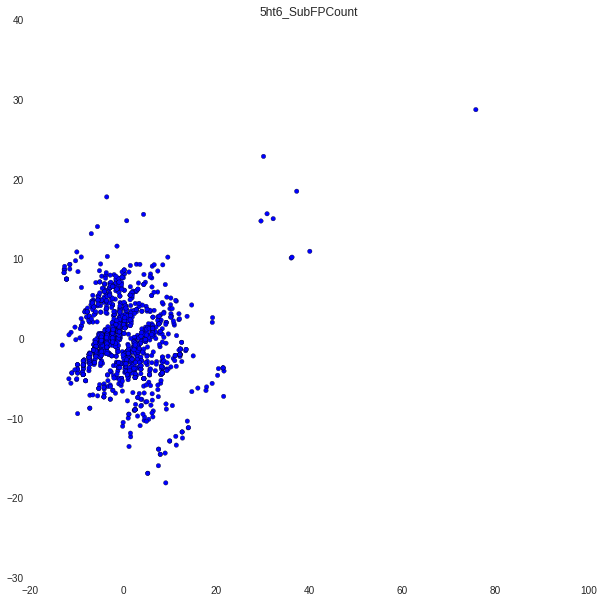

In [14]:
%matplotlib inline

all_combinations = [p for p in list(product(proteins, fingerprints))]

# comps = all_combinations[len(proteins)+fingerprints.index("KlekFP"):len(proteins)+fingerprints.index("KlekFP")+1]
comps = all_combinations[15:16]
fig, axes = plt.subplots(1, 1)
fig.set_figwidth(10*1)
fig.set_figheight(10*1)



if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    preprocess_fncs = [["to_binary", {"all_below": True}]]
    m = DBSCAN(eps=0.01, metric='precomputed')
    
    X, K = calculate_jaccard_distance(force_reload=True, protein=comp[0], fingerprint=comp[1], \
                                               seed=777, preprocess_fncs=preprocess_fncs)
    clusters = m.fit_predict(K)
    
    
    _, Y = _get_raw_data(comp[0], comp[1])

        
    colors = ['rgb'[int(c)] for c in clusters]

    X_pca = get_PCA_of_raw_data(n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])
    ax.legend()
    ax.set_title("_".join(comp))
    ax.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', c=colors)
    ax.legend()
# plt.savefig('foo.png')
plt.show()

In [ ]:

all_combinations = [p for p in list(product(proteins, fingerprints))]
prot_to_draw = 1 # len(proteins)
fing_to_draw = len(fingerprints)
comps = all_combinations[0:fing_to_draw*prot_to_draw]
fig, axes = plt.subplots(prot_to_draw, fing_to_draw)
fig.set_figwidth(10*fing_to_draw)
fig.set_figheight(10*prot_to_draw)


if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    X, Y = _get_raw_data(comp[0], comp[1])
    X_pca = get_PCA_of_raw_data(n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])
    ax.legend()
    ax.set_title("_".join(comp))
    for c, i, target_name in zip("rgb", [-1, 1], ["inactive", "active"]):
        if i == 0:
            continue
        ax.scatter(X_pca[Y == i, 0], X_pca[Y == i, 1], c=c, label=target_name)
    ax.legend()
# plt.savefig('foo.png')
plt.show()

In [35]:
n_folds = 2

In [40]:

protein = "5ht6"
fingerprint = "SubFP"
seed = 777
cluster_size_threshold = 0.1
preprocess_fncs = [["to_binary", {"all_below": True}]]



In [3]:
@cached()
def get_PCA_of_raw_data(n_components, iterated_power, protein, fingerprint, only_positive=False):
    X, Y = _get_raw_data(protein, fingerprint)
    if only_positive:
        X = X[Y==1]
    model = RandomizedPCA(n_components=n_components,iterated_power=iterated_power).fit(X.toarray(), Y)
    return model.transform(X.toarray())

@cached()
def calculate_jaccard_distance(protein, fingerprint, seed, preprocess_fncs, only_positive=False):
    loader = ["get_splitted_data",
              {"n_folds": 1,
               "seed":seed,
               "test_size":0.0}]
    data = get_data([[protein, fingerprint]], loader, preprocess_fncs)
    Y = data[protein+"_"+fingerprint][0][0]["Y_train"]
    X1T = data[protein+"_"+fingerprint][0][0]["X_train"]
    if only_positive:
        X1T = X1T[Y==1]
    X2T = X1T
    X1T_sums = np.array(X1T.sum(axis=1))
    X2T_sums = np.array(X2T.sum(axis=1))
    K = X1T.dot(X2T.T)
    K = K.toarray()
    K2 = -(K.copy())
    K2 += (X1T_sums.reshape(-1,1))
    K2 += (X2T_sums.reshape(1,-1))
    K = K/K2
    return X1T, 1 - K

@cached()
def get_MDS_of_raw_data(n_components,  protein, fingerprint, seed, preprocess_fncs, only_positive=False):
    X, K = calculate_jaccard_distance(protein=protein, fingerprint=fingerprint, \
                                      seed=seed, preprocess_fncs=preprocess_fncs, only_positive=only_positive)
    print K.shape
    print X.shape
    m = MDS(n_components=n_components, n_jobs=4, dissimilarity="precomputed")
    return m, m.fit_transform(K)

2015-06-02 10:27:34,982 - al_ecml2015 - DEBUG - Call get_PCA_of_raw_data
2015-06-02 10:27:34,984 - al_ecml2015 - DEBUG - Call calculate_jaccard_distance
2015-06-02 10:27:34,985 - al_ecml2015 - DEBUG - Call get_MDS_of_raw_data


In [17]:
proteins

['5ht7',
 '5ht6',
 'SERT',
 '5ht2c',
 '5ht2a',
 'hiv_integrase',
 'h1',
 'hERG',
 'cathepsin',
 'hiv_protease',
 'M1',
 'd2']

In [19]:
protein, fingerprint = proteins[1], fingerprints[0]

In [20]:
from get_data import fingerprints

In [21]:
X_pca = get_PCA_of_raw_data(force_reload=True, \
                                 n_components=10, iterated_power=10, protein=protein, fingerprint=fingerprint, 
                            only_positive=False)  

2015-06-02 10:29:03,641 - al_ecml2015 - DEBUG - get_PCA_of_raw_data: Cache miss or force reload. Caching get_PCA_of_raw_data_844a2fb7783709aa2bedbb001ad07dfca3b49ba453dc5acb29003637f6aff44b
2015-06-02 10:29:03,701 - al_ecml2015 - DEBUG - get_PCA_of_raw_data: Saving get_PCA_of_raw_data_844a2fb7783709aa2bedbb001ad07dfca3b49ba453dc5acb29003637f6aff44b


In [29]:
os.listdir(os.path.join(c["DATA_DIR"], "actives"))

['5ht2a_actives_cluster3_SubFP.csv',
 'd2_actives_cluster6_EstateFP.csv',
 '5ht2a_actives_cluster1_ExtFP.csv',
 'beta2_actives_cluster6_KlekFP.csv',
 'd2_actives_cluster5_KlekFP.csv',
 '5ht1a_actives_cluster4_ExtFP.csv',
 'd2_actives_cluster3_KlekFP.csv',
 'beta1_actives_cluster3_EstateFP.csv',
 'd1_actives_cluster7_PubchemFP.csv',
 'd1_actives_cluster5_ExtFP.csv',
 'beta1_actives_cluster4_KlekFP.csv',
 'alpha1a_actives_cluster1_MACCSFP.csv',
 'beta2_actives_cluster6_ExtFP.csv',
 'beta2_actives_cluster6_MACCSFP.csv',
 '5ht6_actives_cluster6_EstateFP.csv',
 '5ht7_actives_cluster7_PubchemFP.csv',
 'd2_actives_cluster6_KlekFP.csv',
 'beta1_actives_cluster5_PubchemFP.csv',
 'd2_actives_cluster3_PubchemFP.csv',
 'd1_actives_cluster1_MACCSFP.csv',
 '5ht7_actives_cluster2_MACCSFP.csv',
 '5ht7_actives_cluster4_KlekFP.csv',
 'beta1_actives_cluster1_SubFP.csv',
 'beta1_actives_cluster1_KlekFP.csv',
 'd1_actives_cluster3_SubFP.csv',
 'd1_actives_cluster4_KlekFP.csv',
 'beta2_actives_cluster1_Esta

In [33]:
import pandas as pd

In [39]:
help(pd.DataFrame.from_csv)

Help on method from_csv in module pandas.core.frame:

from_csv(cls, path, header=0, sep=',', index_col=0, parse_dates=True, encoding=None, tupleize_cols=False, infer_datetime_format=False) method of __builtin__.type instance
    Read delimited file into DataFrame
    
    Parameters
    ----------
    path : string file path or file handle / StringIO
    header : int, default 0
        Row to use at header (skip prior rows)
    sep : string, default ','
        Field delimiter
    index_col : int or sequence, default 0
        Column to use for index. If a sequence is given, a MultiIndex
        is used. Different default from read_table
    parse_dates : boolean, default True
        Parse dates. Different default from read_table
    tupleize_cols : boolean, default False
        write multi_index columns as a list of tuples (if True)
        or new (expanded format) if False)
    infer_datetime_format: boolean, default False
        If True and `parse_dates` is True for a column, try

In [77]:
from misc.config import *

In [101]:
def calculate_jaccard_kernel(X1T, X2T):
    X1T_sums = np.array(X1T.sum(axis=1))
    X2T_sums = np.array(X2T.sum(axis=1))
    K = X1T.dot(X2T.T)
    if hasattr(K, "toarray"):
        K = K.toarray()
    K2 = -(K.copy())
    K2 += (X1T_sums.reshape(-1,1))
    K2 += (X2T_sums.reshape(1,-1))
    K = K.astype("float32")/K2
    return K

In [121]:
n_folds = 3

In [191]:
protein = "5ht2a"
fingerprint = "ExtFP"

In [230]:
def calculate_jaccard_kernel(X1T, X2T):
    X1T_sums = np.array(X1T.sum(axis=1))
    X2T_sums = np.array(X2T.sum(axis=1))
    K = X1T.dot(X2T.T)
    if hasattr(K, "toarray"):
        K = K.toarray()
    K2 = -(K.copy())
    K2 += (X1T_sums.reshape(-1,1))
    K2 += (X2T_sums.reshape(1,-1))
    K = K.astype("float32")/K2
    return K

2828

In [312]:
# Read data
actives, inactives = get_protein_fingerprint_cluster_files(protein, fingerprint)
clusters_active = []
for a, _ in actives:
    clusters_active.append(pd.io.parsers.read_csv(os.path.join(c["DATA_DIR"], a), header=None).as_matrix())

inactive = pd.io.parsers.read_csv(os.path.join(c["DATA_DIR"], inactives), header=None).as_matrix()


In [366]:
pairwise_distances(clusters_active[0], X[:, 0:1023], metric='l1')

array([[ 413.,  388.,  262., ...,  408.,  416.,  466.],
       [ 466.,  469.,  419., ...,  497.,  487.,  495.],
       [ 454.,  459.,  359., ...,  481.,  459.,  461.],
       ..., 
       [ 440.,  411.,  215., ...,  375.,  393.,  435.],
       [ 408.,  415.,  229., ...,  419.,  431.,  457.],
       [ 437.,  400.,  204., ...,  394.,  418.,  442.]])

In [351]:
np.max(pairwise_distances(clusters_active[0], X[:, 0:1023], metric='l1'),axis=1)

array([ 566.,  537.,  553.,  544.,  548.,  589.,  548.,  549.,  557.,
        596.,  543.,  571.,  575.,  580.,  580.,  576.,  593.,  548.,
        539.,  544.,  552.,  555.,  538.,  573.,  555.,  544.,  571.,
        537.,  558.,  541.,  586.,  534.,  578.,  538.,  553.,  577.,
        560.,  576.,  567.,  544.,  572.,  543.,  541.,  581.,  596.,
        558.,  574.,  562.,  534.,  602.,  593.,  566.,  579.,  529.,
        572.,  547.,  544.,  556.,  534.,  619.,  597.,  579.,  602.,
        580.,  579.,  535.,  576.,  615.,  570.,  575.,  534.,  581.,
        533.,  613.,  550.,  559.,  538.,  565.,  556.,  549.,  531.,
        581.,  609.,  531.,  555.,  558.,  608.,  530.,  558.,  535.,
        558.,  528.,  528.,  554.,  547.,  615.,  570.,  557.,  559.,
        582.,  562.,  581.,  573.,  541.,  584.,  572.,  595.,  576.,
        549.,  542.,  564.,  532.,  605.,  575.,  587.,  575.,  601.,
        563.,  532.,  577.,  568.,  564.,  543.,  562.,  571.,  547.,
        585.,  565.,

In [319]:
X

array([[ 1.,  0.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  0.,  0., ...,  0.,  0.,  0.],
       [-1.,  1.,  0., ...,  0.,  0.,  0.]])

In [27]:
proteins_sabina = ["5ht1a", "5ht2a", "5ht6", "5ht7", \
                   "alpha1a", "beta1", "beta2", "d1", "d2"]

In [12]:
from sklearn.metrics.pairwise import pairwise_distances

def get_protein_fingerprint_cluster_files(protein, fingerprint):
    inactives = ["inactives/"+x for x in os.listdir(os.path.join(c["DATA_DIR"], "inactives")) if x.startswith(protein + "_inactives") and x.endswith(fingerprint+".csv")]
    actives = [("actives/"+x, int(x.split("_")[2][-1])) for x in os.listdir(os.path.join(c["DATA_DIR"], "actives")) if x.startswith(protein + "_actives") and x.endswith(fingerprint + ".csv")]
    # This magic lines ensures there are no clusters of id > 9
    assert(sorted(list(set([a[1] for a in actives]))) == sorted([a[1] for a in actives]))
    return sorted(actives, key=lambda x: x[1]), inactives[0]

def get_sabina_clusters(protein, fingerprint):

    # Read data
    actives, inactives = get_protein_fingerprint_cluster_files(protein, fingerprint)
    clusters_active = []
    for a, _ in actives:
        clusters_active.append(pd.io.parsers.read_csv(os.path.join(c["DATA_DIR"], a), header=None).as_matrix().astype("float32"))

    inactive = pd.io.parsers.read_csv(os.path.join(c["DATA_DIR"], inactives), header=None).as_matrix().astype("float32")

    # Standarize sizes
    max_cols = max(inactive.shape[1], max(cl.shape[1] for cl in clusters_active))
    for cl_id, cl in enumerate(clusters_active):
        if cl.shape[1] != max_cols:
            clusters_active[cl_id] = np.hstack([cl, np.zeros(shape=(cl.shape[0], max_cols - cl.shape[1]))])
    if inactive.shape[1] != max_cols:
            inactive = np.hstack([inactive, np.zeros(shape=(inactive.shape[0], max_cols - inactive.shape[1]))])

    # Preprocess: cluster of compunds -> cluster of ids of compounds

    # Start with biggest
    biggest_id = np.argsort([-cluster.shape[0] for cluster in clusters_active])[0]
    X = clusters_active[biggest_id]

    print X.shape[0]
    clusters_active_ids = [range(X.shape[0])]
    max_id = X.shape[0] - 1
    print [cl.shape[0] for cl in clusters_active]
    for cluster_id, cluster in enumerate(clusters_active):
        if cluster_id != biggest_id:
            if not np.isfinite(cluster).all():
                raise ValueError("F*CK, nan in cluster file.")
            similarities = np.min(pairwise_distances(cluster, X, metric='l1'), axis=1)
            X = np.vstack([X, cluster[similarities!=0]])
            start_id = max_id + 1
            existing = list(np.where(similarities==0)[0])
            clusters_active_ids.append(existing + range(start_id, start_id +  (similarities!=0).sum()))
            max_id = max(max_id, max(clusters_active_ids[-1])) # Update max_id
            assert(len(clusters_active_ids[-1]) == cluster.shape[0])
      
    X = np.vstack([X, inactive ])

    inactive_ids = range(max_id+1, max_id+1+inactive.shape[0])
    
    
    Y = np.zeros(shape=(X.shape[0], 1))
    Y[:] = 1
    Y[max_id+1:] = -1
    
    return X, Y, [np.array(cl).reshape(-1) for cl in clusters_active_ids], np.array(inactive_ids).reshape(-1)

In [28]:
X, Y, clusters_active_ids, inactive_ids = get_sabina_clusters("5ht1a", "SubFP")

5669
[6, 12, 30, 5669, 11, 3]


In [60]:
def can_be_A_easier(i, X, clusters_active_ids, inactive):
    # A cluster is a good A-cluster candidate if it is big and the rest of active clusters are big
    difference_A_C = [ len(set(cl_ids).difference(clusters_active_ids[i])) for cl_ids in clusters_active_ids]
    
    active_size = X.shape[0] - inactive.shape[0]
    print difference_A_C, sum(difference_A_C), active_size
    return \
        sum(difference_A_C) > 0.1*active_size \
        and len(clusters_active_ids[i]) > 0.4*active_size

In [ ]:
def can_be_A(i):
    # A cluster is a good A-cluster candidate if there exists another cluster that has at least 10% of
    # disjoint members and is itself > 50%
    difference_A_C = [ len(set(cl_ids).difference(clusters_active_ids[i])) for cl_ids in clusters_active_ids]
    difference_C_A = [ len(set(clusters_active_ids[i]).difference(cl_ids)) for cl_ids in clusters_active_ids]
    # Idea is that at least one pair (A,C) of clusters has at least 10% unique members in A\C and C\A
    print len(clusters_active_ids[i])
    print difference_A_C
    print difference_C_A
    print 0.1 * X.shape[0]
    print [size_ac > 0.1 * X.shape[0] and size_ca > 0.06 * X.shape[0] for size_ac, size_ca in zip(difference_A_C, difference_C_A)]
    return \
        any(size_ac > 0.1 * X.shape[0] and size_ca > 0.06 * X.shape[0] 
                for size_ac, size_ca in zip(difference_A_C, difference_C_A)) \
        and len(clusters_active_ids[i]) > 0.5*X.shape[0]

In [62]:
# Pick A cluster
s = []
sizes = []
for p in proteins_sabina:
    try:
        X, Y, clusters_active_ids, inactive_ids = get_sabina_clusters(p, "KlekFP")
#         print([cl.shape[0] for cl in clusters_active_ids])
        sizes.append([cl.shape[0] for cl in clusters_active_ids])
        A_candidates = [(cl.shape[0], id) for id, cl in enumerate(clusters_active_ids) if can_be_A_easier(id, X, clusters_active_ids, inactive_ids)]

        if len(A_candidates) == 0:
            print "Not satisfied for ", p
            s.append("Not satisfied")
        else:
            print "OK"
            s.append("OK")
    except Exception, e:
        print e
        sizes.append([])
        s.append(str(e))
#         raise ValueError("No cluster qualified for experiment A-type cluster. F*CK")
#     np.max(A_candidates)

5669
[6, 12, 30, 5669, 11, 3]
[0, 6, 12, 30, 11, 3] 62 5731
[5669, 0, 12, 30, 11, 3] 5725 5731
[5669, 6, 0, 30, 11, 3] 5719 5731
[5669, 6, 12, 0, 11, 3] 5701 5731
[5669, 6, 12, 30, 0, 3] 5720 5731
[5669, 6, 12, 30, 11, 0] 5728 5731
Not satisfied for  5ht1a
2828
[191, 29, 55, 2828, 11, 6, 2]
[0, 191, 29, 55, 11, 6, 2] 294 3122
[2828, 0, 29, 55, 11, 6, 2] 2931 3122
[2828, 191, 0, 55, 11, 6, 2] 3093 3122
[2828, 191, 29, 0, 11, 6, 2] 3067 3122
[2828, 191, 29, 55, 0, 6, 2] 3111 3122
[2828, 191, 29, 55, 11, 0, 2] 3116 3122
[2828, 191, 29, 55, 11, 6, 0] 3120 3122
Not satisfied for  5ht2a
1885
[23, 40, 1885, 50, 2, 2]
[0, 23, 40, 50, 2, 2] 117 2002
[1885, 0, 40, 50, 2, 2] 1979 2002
[1885, 23, 0, 50, 2, 2] 1962 2002
[1885, 23, 40, 0, 2, 2] 1952 2002
[1885, 23, 40, 50, 0, 2] 2000 2002
[1885, 23, 40, 50, 2, 0] 2000 2002
Not satisfied for  5ht6
1024
[47, 23, 9, 143, 1024, 3, 8]
[0, 47, 23, 9, 143, 3, 8] 233 1257
[1024, 0, 23, 9, 143, 3, 8] 1210 1257
[1024, 47, 0, 9, 143, 3, 8] 1234 1257
[1024, 47,

In [38]:
s

[[5669, 6, 12, 30, 11, 3],
 'Not satisfied',
 [2828, 191, 29, 55, 11, 6, 2],
 'Not satisfied',
 [1885, 23, 40, 50, 2, 2],
 'Not satisfied',
 [1024, 47, 23, 9, 143, 3, 8],
 'Not satisfied',
 "Input contains NaN, infinity or a value too large for dtype('float32').",
 [214, 19, 5, 196, 8, 15, 4],
 'Not satisfied',
 [548, 408, 548, 22, 2, 114],
 'Not satisfied',
 [592, 16, 20, 287, 4, 2, 2],
 'Not satisfied',
 [6357, 6, 17, 32, 87, 11],
 'Not satisfied']

In [57]:
for p, result, size in zip(proteins_sabina, s, sizes):
    print "Protein: ",p
    print "Satisfied?", result
    print "Sizes of clusters", size
    print "-----\n"

Protein:  5ht1a
Satisfied? Not satisfied
Sizes of clusters [5669, 6, 12, 30, 11, 3]
-----

Protein:  5ht2a
Satisfied? Not satisfied
Sizes of clusters [2828, 191, 29, 55, 11, 6, 2]
-----

Protein:  5ht6
Satisfied? Not satisfied
Sizes of clusters [1885, 23, 40, 50, 2, 2]
-----

Protein:  5ht7
Satisfied? Not satisfied
Sizes of clusters [1024, 47, 23, 9, 143, 3, 8]
-----

Protein:  alpha1a
Satisfied? Input contains NaN, infinity or a value too large for dtype('float32').
Sizes of clusters []
-----

Protein:  beta1
Satisfied? Not satisfied
Sizes of clusters [214, 19, 5, 196, 8, 15, 4]
-----

Protein:  beta2
Satisfied? OK
Sizes of clusters [548, 408, 548, 22, 2, 114]
-----

Protein:  d1
Satisfied? OK
Sizes of clusters [592, 16, 20, 287, 4, 2, 2]
-----

Protein:  d2
Satisfied? Not satisfied
Sizes of clusters [6357, 6, 17, 32, 87, 11]
-----



In [34]:
pd.DataFrame(s)

,0
0,0
1,0
2,0
3,0


In [80]:


# Keep track of indices
size = sum(c.shape[0] for c in clusters_active) + inactive.shape[0]
cluster_id = np.zeros(shape=(size,1))
start_id = 0
for c_id, cluster in enumerate(clusters_active):
    cluster_id[start_id:start_id +cluster.shape[0]] = c_id
    start_id += cluster.shape[0]
cluster_id[start_id:] = -1

In [119]:
# Assert that we have sensible indexing
assert(all(list(cluster_id[clusters_active[0].shape[0]: clusters_active[0].shape[0] + clusters_active[1].shape[0]] == 1)))

In [177]:
clusters_active[0].shape[0]

408

In [158]:
# Now we pick biggest one denoted as A
A_id = np.argsort([-cluster.shape[0] for cluster in clusters_active])[0]

In [171]:
similarities = calculate_jaccard_kernel(clusters_active[0], clusters_active[A_id])

In [169]:
B

[array([], shape=(0, 4861), dtype=int64), array([[1, 1, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 0, 0, 0]]), array([], shape=(0, 4861), dtype=int64), array([], shape=(0, 4861), dtype=int64), array([], shape=(0, 4861), dtype=int64)]

In [ ]:
# Check if random picked

In [ ]:
from models.strategy import jaccard_similarity_score_fast

# Some magic: assigning each inactive to the closest active cluster by mean
similarities = []
for cluster in clusters_active:
    similarities.append(calculate_jaccard_kernel(inactive, cluster).mean(axis=1).reshape(-1,1))
# Each col has mean distance of col-th cluster to row-th inactive example
similarities = np.hstack(similarities) 

# Do assignment
active_size = sum(cluster.shape[0] for cluster in clusters_active)
for i in range(inactive.shape[0]):
    cluster_id[i + active_size] = np.argmax(similarities[i,:])
    
# Assert that similarities is what we want
assert np.abs(similarities[10,1] - np.mean([jaccard_similarity_score_fast(inactive[10], clusters_active[1][i]) for i in range(clusters_active[1].shape[0])])) < 1e-3    

In [153]:
[cluster.shape[0] for cluster in clusters_active]

[408, 548, 548, 22, 2, 114]

In [151]:
K = calculate_jaccard_kernel(clusters_active[0], clusters_active[1])

In [131]:
clusters_active[1]

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ..., 
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]])

array([1, 2, 0, 5, 3, 4])

In [ ]:
if n_folds == 1:
    fold_indices = [[range(y.shape[0]), None]]
else:
    fold_indices = StratifiedKFold(cluster_id, n_folds=n_folds, shuffle=True, random_state=seed)


In [109]:
distances

array([[ 0.38955786,  0.36145997,  0.36083642,  0.30913214,  0.42754011,
         0.2709164 ],
       [ 0.33239833,  0.32998459,  0.32945949,  0.27452522,  0.27354338,
         0.33268768],
       [ 0.363399  ,  0.3520259 ,  0.35164549,  0.34338455,  0.25724276,
         0.31628016],
       ..., 
       [ 0.2250653 ,  0.21474378,  0.21431978,  0.22085028,  0.44405371,
         0.17264153],
       [ 0.17126547,  0.18840759,  0.18839424,  0.17281369,  0.17294318,
         0.25291786],
       [ 0.17922855,  0.19436391,  0.19430087,  0.17918343,  0.18016967,
         0.25147731]])

In [ ]:
distances[1]

In [75]:
size

2038

In [73]:
clusters_active[0].shape

(408, 4861)

In [72]:
clusters_active[1].shape

(548, 4861)

In [54]:
x = 

In [55]:
x

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1]])

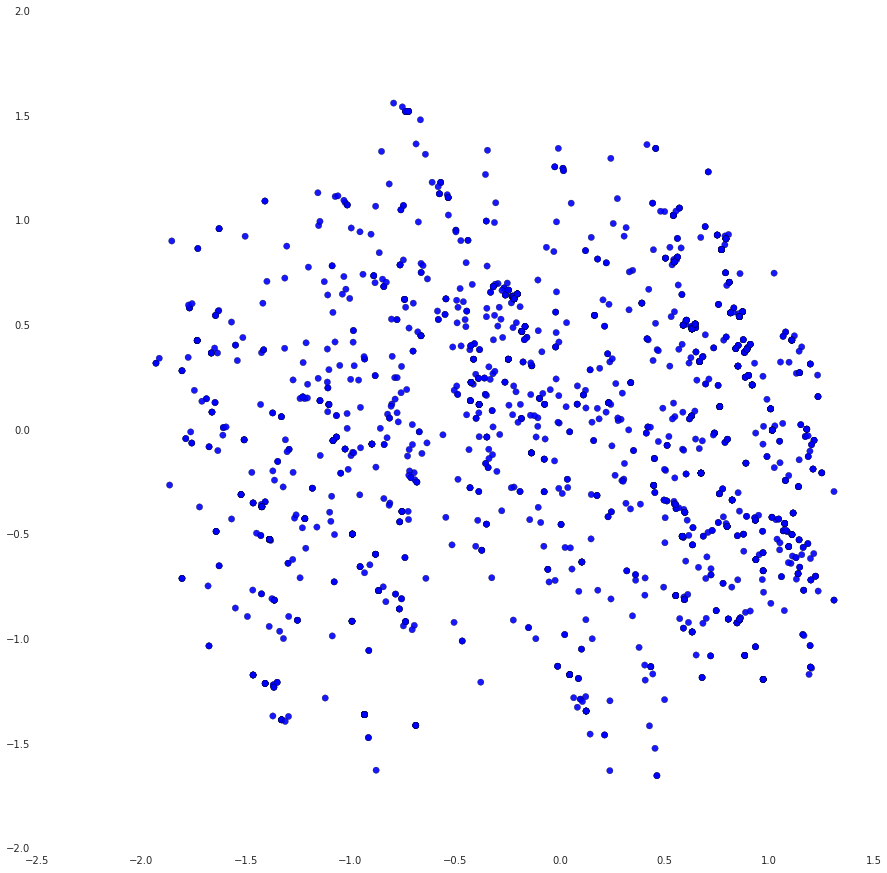

In [27]:
import seaborn
%matplotlib inline
plt.figure(figsize=(15,15))
# f, ax = plt.subplots(1,1)
# for j, cluster in enumerate(clusters[0:2]):
#     X_pca_picked = X_pca[colors==j,:]
#     cols = np.array([j for k in range(X_pca_picked.shape[0])])
plt.scatter(X_pca[:,0], X_pca[:,1], s=40, alpha=0.9, cmap=plt.get_cmap("Pastel1"))
plt.show()

In [200]:
interestingness_index(X, big_subtrees[0], big_subtrees[1])

0.750363835737 0.750510638025 0.742076748227


1.0054538081295807

In [204]:
len(set(big_subtrees[0]))

101

In [209]:
interestingness_index(X, big_subtrees[0], big_subtrees[1])

0.750363835737 0.750510638025 0.742076748227


1.0054538081295807

In [207]:
len(set(big_subtrees[0]).intersection(set(big_subtrees[1])))

0

In [123]:
sum(len(subtree) > check_threshold for subtree in id_to_nodes.values())

28

In [224]:
import graphviz as gv
g = gv.Graph(format='svg')
for i in range(K.shape[0]):
    g.node(str(i))
# Nodes in m.children_ are sorted by merging time
for id, n in enumerate(m.children_):
    g.node(str(id + K.shape[0]))
    g.edge(str(id + K.shape[0]), str(n[0]))
    g.edge(str(id + K.shape[0]), str(n[1]))
    id_to_nodes[id  + K.shape[0]] = id_to_nodes[n[0]] + id_to_nodes[n[1]]
g.render("clustering")

'clustering.svg'

In [42]:
np.where(clusters==0)

(array([   0,    1,    2, ..., 1828, 1829, 1830]),)

In [365]:
@cached()
def get_PCA_of_raw_data(n_components, iterated_power, protein, fingerprint, only_positive=False):
    X, Y = _get_raw_data(protein, fingerprint)
    if only_positive:
        X = X[Y==1]
    model = RandomizedPCA(n_components=n_components,iterated_power=iterated_power).fit(X.toarray(), Y)
    return model.transform(X.toarray())



@cached()
def get_MDS_of_raw_data(n_components,  protein, fingerprint, seed, preprocess_fncs, only_positive=False):
    X, K = calculate_jaccard_distance(protein=protein, fingerprint=fingerprint, \
                                      seed=seed, preprocess_fncs=preprocess_fncs, only_positive=only_positive)
    print K.shape
    print X.shape
    m = MDS(n_components=n_components, n_jobs=4, dissimilarity="precomputed")
    return m, m.fit_transform(K)

2015-05-31 17:50:23,038 - al_ecml2015 - DEBUG - Call get_PCA_of_raw_data
2015-05-31 17:50:23,039 - al_ecml2015 - DEBUG - Call calculate_jaccard_distance
2015-05-31 17:50:23,040 - al_ecml2015 - DEBUG - Call get_MDS_of_raw_data


In [ ]:
%matplotlib inline

In [9]:
import seaborn
all_combinations = [p for p in list(product(proteins, fingerprints))]
prot_to_draw = 1 #len(proteins)
fing_to_draw = len(fingerprints)
comps = all_combinations[len(fingerprints): len(fingerprints)*2]
fig, axes = plt.subplots(prot_to_draw, fing_to_draw)
fig.set_figwidth(20*fing_to_draw)
fig.set_figheight(20*prot_to_draw)
preprocess_fncs = [['to_binary', {'all_below': True}]]


if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    print comp
#     X, Y = _get_raw_data(comp[0], comp[1])
    X_mds = get_MDS_of_raw_data(n_components=2, seed=777, protein=comp[0], \
                                fingerprint=comp[1], preprocess_fncs=preprocess_fncs, only_positive=True)
#     X_mds = get_PCA_of_raw_data(force_reload=True, \
#                                 n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])  
    ax.legend()
    ax.set_title("_".join(comp))
    ax.scatter(X_mds[:, 0], X_mds[:, 1])
    ax.legend()
plt.savefig('pca_5ht6_one_class_2_comp.png')
#plt.show()

2015-05-31 13:19:14,157 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_ee487cd4db6af38ca1d9d041f5ac6f2255db1b344957122a4ec1ede40438ab53
2015-05-31 13:19:14,158 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'EstateFP')
(1490, 1490)
(1490, 68)


2015-05-31 13:20:02,002 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_ee487cd4db6af38ca1d9d041f5ac6f2255db1b344957122a4ec1ede40438ab53
2015-05-31 13:20:02,041 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_7ca7337cae71b96d713476784c2336aa49d5d03f06f7769c5afb5caa32811d84
2015-05-31 13:20:02,042 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'ExtFP')
(1490, 1490)
(1490, 2012)


2015-05-31 13:20:54,680 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_7ca7337cae71b96d713476784c2336aa49d5d03f06f7769c5afb5caa32811d84
2015-05-31 13:20:54,702 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_73c21cdb64948caaec508c0d1ed37b034f8758facb016020c16bfe45ad50fd20
2015-05-31 13:20:54,703 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'KlekFP')
(1490, 1490)
(1490, 2502)


2015-05-31 13:21:48,348 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_73c21cdb64948caaec508c0d1ed37b034f8758facb016020c16bfe45ad50fd20
2015-05-31 13:21:48,378 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_a3a3296a8819ce629225f06a83fdf4bfd0f327b3329baa0cfd93f638056132dc
2015-05-31 13:21:48,380 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'KlekFPCount')
(1490, 1490)
(1490, 4429)


2015-05-31 13:22:42,403 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_a3a3296a8819ce629225f06a83fdf4bfd0f327b3329baa0cfd93f638056132dc
2015-05-31 13:22:42,439 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_580ec0c3091076e2d36311d8cb5cb72ac4d5a33fbcb2ecc373b17580178ff4f2
2015-05-31 13:22:42,440 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'MACCSFP')
(1490, 1490)
(1490, 294)


2015-05-31 13:23:35,011 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_580ec0c3091076e2d36311d8cb5cb72ac4d5a33fbcb2ecc373b17580178ff4f2
2015-05-31 13:23:35,029 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_e46c39af64067e215af06da9a176e28836ed8d4952ab6fae08fca724b36f08b0
2015-05-31 13:23:35,030 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'PubchemFP')
(1490, 1490)
(1490, 1172)


2015-05-31 13:24:22,242 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_e46c39af64067e215af06da9a176e28836ed8d4952ab6fae08fca724b36f08b0
2015-05-31 13:24:22,264 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_c3202dfb1b4963f352fc803a545cfdc565ae16009475e91dc41335628913f52e
2015-05-31 13:24:22,265 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'SubFP')
(1490, 1490)
(1490, 218)


2015-05-31 13:25:12,580 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_c3202dfb1b4963f352fc803a545cfdc565ae16009475e91dc41335628913f52e
2015-05-31 13:25:12,613 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Cache miss or force reload. Caching get_MDS_of_raw_data_4dc7fec6a19c60c6e9d0e2e7cd289449670a80a75d90d3c261f73821a48b64c5
2015-05-31 13:25:12,615 - al_ecml2015 - DEBUG - calculate_jaccard_distance:Loading (pickled?) file


('5ht6', 'SubFPCount')
(1, 1)
(1, 108)


2015-05-31 13:25:12,956 - al_ecml2015 - DEBUG - get_MDS_of_raw_data: Saving get_MDS_of_raw_data_4dc7fec6a19c60c6e9d0e2e7cd289449670a80a75d90d3c261f73821a48b64c5


In [2]:
import seaborn
all_combinations = [p for p in list(product(proteins, fingerprints))]
prot_to_draw = 1 #len(proteins)
fing_to_draw = len(fingerprints)
comps = all_combinations[0:fing_to_draw*prot_to_draw]
fig, axes = plt.subplots(prot_to_draw, fing_to_draw)
fig.set_figwidth(10*fing_to_draw)
fig.set_figheight(10*prot_to_draw)

if hasattr(axes, "reshape"):
    axes = axes.reshape(-1)
else:
    axes = [axes]
    
for ax, comp in zip(axes, comps):
    X, Y = _get_raw_data(comp[0], comp[1])
    X = X[Y==1] # Pick only positive
    X_pca = get_PCA_of_raw_data(force_reload=True, \
                                n_components=10, iterated_power=10, protein=comp[0], fingerprint=comp[1])
    ax.legend()
    ax.set_title("_".join(comp))
    ax.scatter(X_pca[:, 0], X_pca[:, 1])
    ax.legend()
plt.savefig('foo.png')
# plt.show()

NameError: name 'get_PCA_of_raw_data' is not defined

In [ ]:
get_best(grid_results_random.experiments, metric="mean_mcc_valid").results['mean_mcc_valid']

In [ ]:
get_best(grid_results_uncert.experiments, metric="mean_mcc_valid").results['mean_mcc_valid']

In [ ]:
import sklearn